<a href="https://colab.research.google.com/github/Chandana0127/Academor-Internship-Project/blob/main/Major_Project_ML(Academor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing necessary libraries**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# **2. Import the dataset provided**

In [ ]:
# Load the dataset
loan_data = pd.read_csv('Loan_Data.csv')

# **3. Understand the data**

In [ ]:
# Display the first few rows of the dataset
loan_data.head()
# Get info about the dataset, data types, and missing values
loan_data.info()
# Summary statistics of the dataset
loan_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# **4. Deal with the missing values if any**

In [ ]:
# Check for missing values in each column
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# **Cleaning the data**

In [ ]:
loan_data = loan_data.dropna() # Cleaned The Data

In [ ]:
loan_data.isnull().sum() # Just checking if there are still any missing values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# **Checking for duplicates in the dataset**

In [ ]:
# Checking for duplicates in the dataset

duplicates = loan_data.duplicated()

# Count the number of duplicates in the dataset
num_duplicates = duplicates.sum()

# Check if the dataset has any duplicates
if num_duplicates > 0:
    print(f"The dataset has {num_duplicates} duplicate rows.")
else:
    print("The dataset does not contain any duplicates.")


The dataset does not contain any duplicates.


# **Removing the Outliers**

In [ ]:
# To remove outliers of'ApplicantIncome' and 'LoanAmount'
cols_to_check = ['ApplicantIncome', 'LoanAmount']

# Calculating Q1 and Q3 for the specified columns
Q1 = loan_data[cols_to_check].quantile(0.25)
Q3 = loan_data[cols_to_check].quantile(0.75)

# Calculating IQR (Interquartile Range) for the specified columns
IQR = Q3 - Q1

# Defining a threshold beyond which data points are considered outliers
threshold = 1.5

# Creating a boolean mask to identify rows containing outliers
outlier_mask = (loan_data[cols_to_check] < (Q1 - threshold * IQR)) | (loan_data[cols_to_check] > (Q3 + threshold * IQR))

# Removing rows with outliers
loan_data= loan_data[~outlier_mask.any(axis=1)]

# 5. **Do some visualization if necessary**

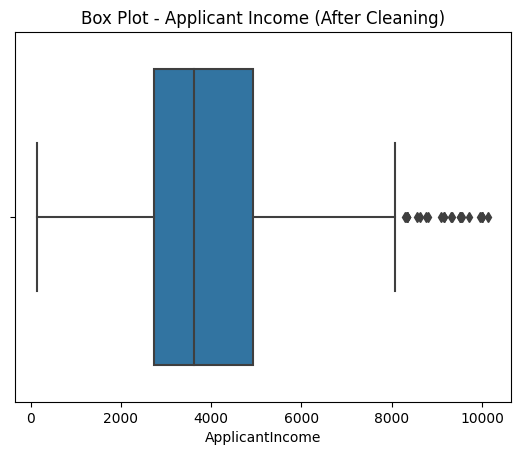

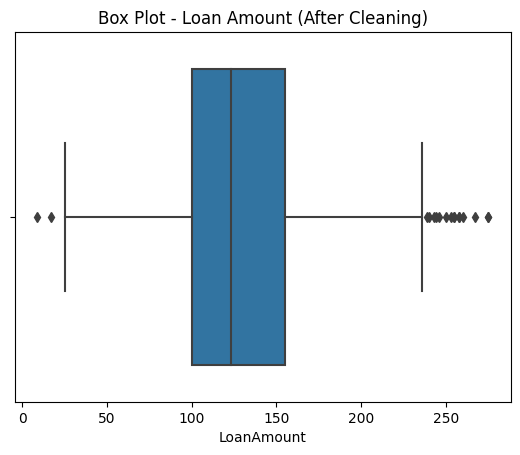

In [ ]:
# Create a box plot for 'ApplicantIncome' after cleaning
sns.boxplot(x=loan_data['ApplicantIncome'])
plt.title("Box Plot - Applicant Income (After Cleaning)")
plt.show()

# Create a box plot for 'LoanAmount' after cleaning
sns.boxplot(x=loan_data['LoanAmount'])
plt.title("Box Plot - Loan Amount (After Cleaning)")
plt.show()


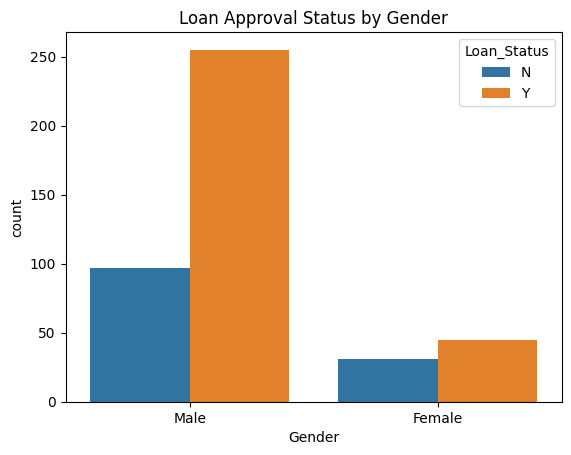

In [ ]:
# Countplot of 'Gender' with hue based on 'Loan_status'
sns.countplot(data=loan_data, x='Gender', hue='Loan_Status')
plt.title("Loan Approval Status by Gender")
plt.show()


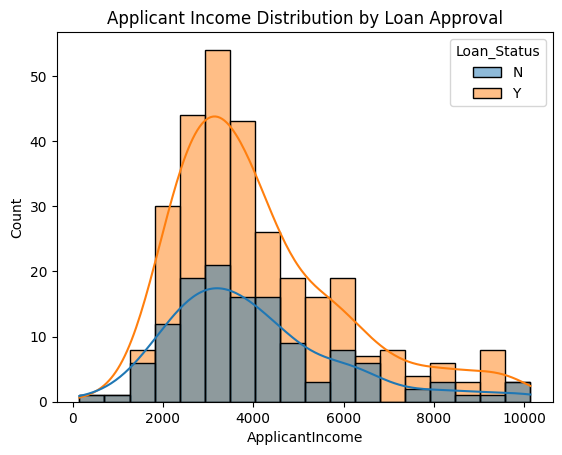

In [ ]:
# Histogram of 'ApplicantIncome' with hue based on 'Loan_status'
sns.histplot(data=loan_data, x='ApplicantIncome', hue='Loan_Status', kde=True)
plt.title("Applicant Income Distribution by Loan Approval")
plt.show()


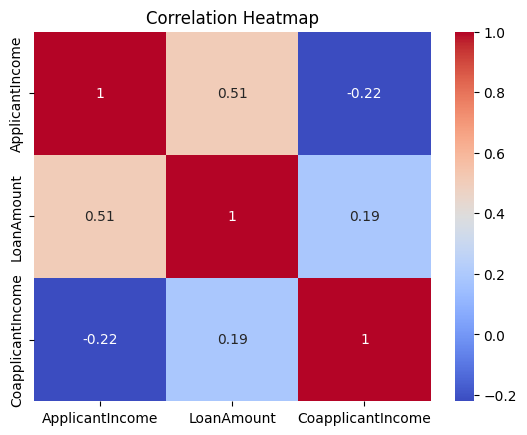

In [ ]:
# Calculate the correlation matrix
correlation_matrix = loan_data[['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome']].corr()

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


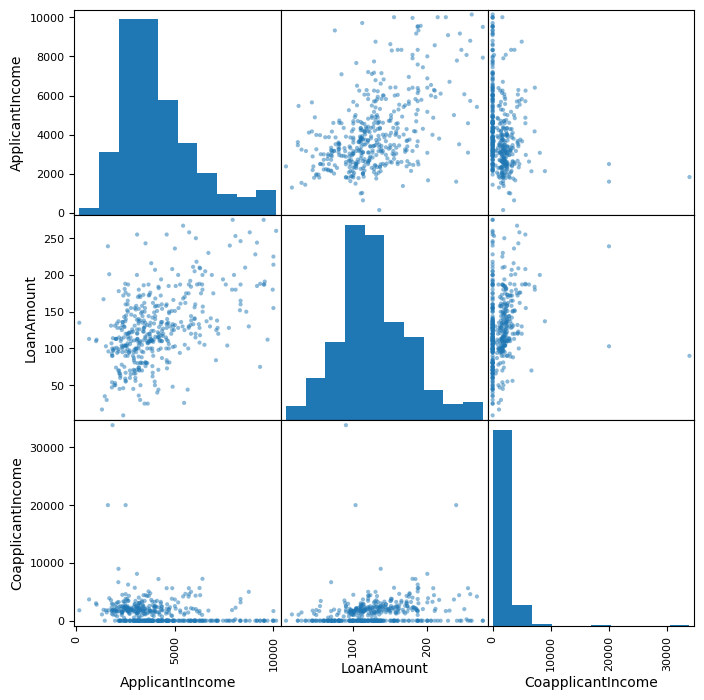

In [ ]:
# Scatter matrix plot for numerical variables
pd.plotting.scatter_matrix(loan_data[['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome']], figsize=(8, 8))
plt.show()


# **6. Divide the dataset into training and test datasets**


In [ ]:
# Separate features (X) and target variable (y)
X = loan_data.drop(columns=['Loan_Status'])  # Features (all columns except 'Loan_status')
y = loan_data['Loan_Status']  # Target variable

# Split the data into training and test sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The data is now divided into X_train (features for training), X_test (features for testing),
# y_train (target variable for training), and y_test (target variable for testing).


# **7. Build the machine learning model which ever is suitable for the dataset**

# **Random Forest classifier**

In [ ]:
# Initialize the machine learning model (e.g., RandomForestClassifier)
model = RandomForestClassifier(random_state=42)

# **8. Fit the model on the training dataset**

In [ ]:
# Train the model on the training dataset
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)

# **9. Test the model and find the accuracy of the model on the test and the training datasets**

In [ ]:
# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy:.2f}")


Accuracy of the Random Forest model: 0.83


# **10. Create a confusion matrix**

In [ ]:
# Create a confusion matrix to evaluate the model's performance
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10 14]
 [ 1 61]]


# **At last, draw conclusions based on the dataset provided**

> Interpretation of additional evaluation metrics:

*   Accuracy: The overall accuracy of the model is 0.82,
meaning it correctly predicts the loan status for approximately 82% of the test data.
*   Precision: The precision for the 'Loan Approved' class (class 1) is 0.81, which means that among the predicted 'Loan Approved' cases, 81% are correct.


*   Recall: The recall for the 'Loan Approved' class (class 1) is 0.98, indicating that the model correctly identifies 98% of the 'Loan Approved' cases from the actual positive cases.

*   F1-score: The F1-score for the 'Loan Approved' class is 0.89, which is the harmonic mean of precision and recall. It provides a balance between the two metrics.


---



> Overall, the model seems to have good recall for the 'Loan Approved' class, indicating that it correctly identifies a high percentage of actual loan approvals. However, the precision for the 'Loan Approved' class is relatively lower, suggesting that among the predicted loan approvals, some cases might be false positives.


> To improve the model's performance, you may consider fine-tuning the Random Forest hyperparameters, using feature engineering techniques, or trying different algorithms. Additionally, depending on the specific requirements of the loan sanction project, you might prioritize precision or recall based on the business context and the consequences of false positives and false negatives.

